# Scatterplots and Correlation
> ```Quanti```tative vs. ```Quanti```tative

#### 使用的工具
> - [plt.scatter()](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.scatter.html)
- [sns.regplot()](https://seaborn.pydata.org/generated/seaborn.regplot.html)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

fuel_df = pd.read_csv('./fuel-econ.csv')
fuel_df.head()

,id,make,model,year,VClass,drive,trans,fuelType,cylinders,displ,pv2,pv4,city,UCity,highway,UHighway,comb,co2,feScore,ghgScore
0,32204,Nissan,GT-R,2013,Subcompact Cars,All-Wheel Drive,Automatic (AM6),Premium Gasoline,6,3.8,79,0,16.4596,20.2988,22.5568,30.1798,18.7389,471,4,4
1,32205,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (AM-S6),Premium Gasoline,4,2.0,94,0,21.8706,26.9770,31.0367,42.4936,25.2227,349,6,6
2,32206,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,17.4935,21.2000,26.5716,35.1000,20.6716,429,5,5
3,32207,Volkswagen,CC 4motion,2013,Compact Cars,All-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,16.9415,20.5000,25.2190,33.5000,19.8774,446,5,5
4,32208,Chevrolet,Malibu eAssist,2013,Midsize Cars,Front-Wheel Drive,Automatic (S6),Regular Gasoline,4,2.4,0,95,24.7726,31.9796,35.5340,51.8816,28.6813,310,8,8


### Engine displacement (liter) vs. Overall fuel mileage (miles per gallon)

#### plt.scatter()

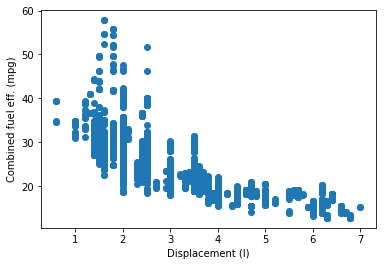

In [2]:
plt.scatter(data=fuel_df, x='displ', y='comb')
plt.xlabel('Displacement (l)')
plt.ylabel('Combined fuel eff. (mpg)');

#### sns.regplot()
> By default, the regression function is linear, and includes a shaded confidence region for the regression estimate.

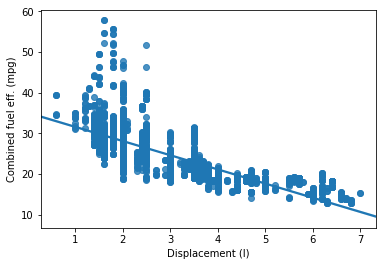

In [3]:
sns.regplot(data=fuel_df, x='displ', y='comb')
plt.xlabel('Displacement (l)')
plt.ylabel('Combined fuel eff. (mpg)');

#### Note:
There might be $log(y) ∝ x$ relationship (that is, linear increases in the value of x are associated with linear increases in the log of y) in the data.  

If we want to plot the regression line on the observed relationship in the data, we need to transform the data.
``` python
def log_trans(x, inverse = False):
    if not inverse:
        return np.log10(x)
    else:
        return np.power(10, x)

sb.regplot(df['num_var1'], df['num_var2'].apply(log_trans))
tick_locs = [10, 20, 50, 100, 200, 500]
plt.yticks(log_trans(tick_locs), tick_locs)
```

# Overplotting
> Where a plot is create with too many overlapping points or our numeric variables are discrete-valued.

Can be solved with:
1. Sampling - Randomly choose less points.
2. Transparency
3. Jitter - Add a small amount of random noise to the position of each point.

### Manufacturing year vs. Overall fuel mileage (miles per gallon)

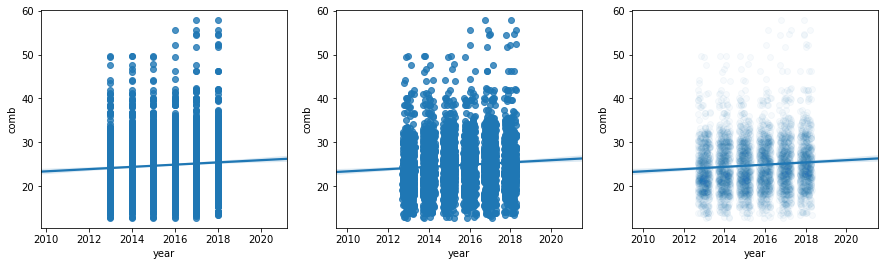

In [4]:
plt.figure(figsize=(15, 4))
plt.subplot(1, 3, 1)
sns.regplot(data=fuel_df, x='year', y='comb');
# add jitter
plt.subplot(1, 3, 2)
sns.regplot(data=fuel_df, x='year', y='comb', x_jitter=0.3);
# add transparency
plt.subplot(1, 3, 3)
sns.regplot(data=fuel_df, x='year', y='comb',
            x_jitter=0.3,
            scatter_kws = {'alpha' : 1/30});

> The right most plot is more distinguishable. Note the regression line won't affect by jitter.

# Heat map
> A heat map is a 2-d version of the histogram that can be used as an alternative to a scatterplot. 
- Good for discrete variable vs. discrete variable.
- Good alternative to tranceparency for a lot of data.
- Bin sizes are important!

#### 使用的工具
> - [plt.hist2d()](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.hist2d.html)

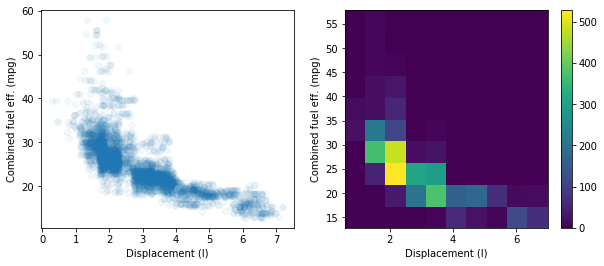

In [5]:
plt.figure(figsize=(10, 4))
# scatter plot
plt.subplot(1, 2, 1)
sns.regplot(data=fuel_df, x='displ', y='comb', x_jitter=.3, scatter_kws={'alpha': 1/20}, fit_reg=False)
plt.xlabel('Displacement (l)')
plt.ylabel('Combined fuel eff. (mpg)')

# heat map
plt.subplot(1, 2, 2)
plt.hist2d(data=fuel_df, x='displ', y='comb')
plt.colorbar()
plt.xlabel('Displacement (l)')
plt.ylabel('Combined fuel eff. (mpg)');

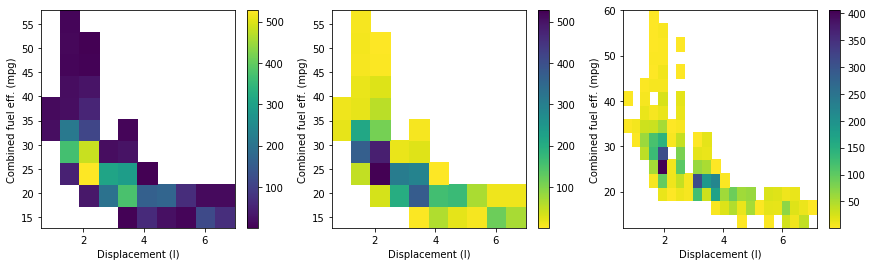

In [6]:
plt.figure(figsize=(20, 4))
plt.subplot(1, 4, 1)
# Set minimum bound of count - distinguish cells with zero counts from those with non-zero counts
plt.hist2d(data=fuel_df, x='displ', y='comb', cmin=0.5)
plt.colorbar()
plt.xlabel('Displacement (l)')
plt.ylabel('Combined fuel eff. (mpg)')

# reverse the color bar
plt.subplot(1, 4, 2)
plt.hist2d(data=fuel_df, x='displ', y='comb', cmin=0.5, cmap='viridis_r')
plt.colorbar()
plt.xlabel('Displacement (l)')
plt.ylabel('Combined fuel eff. (mpg)')

# change bins
x_bins = np.arange(0.6, 7+0.3, 0.3)
y_bins = np.arange(12, 58+3, 3)
plt.subplot(1, 4, 3)
plt.hist2d(data=fuel_df, x='displ', y='comb', cmin=0.5, cmap='viridis_r', bins=[x_bins, y_bins])
plt.colorbar()
plt.xlabel('Displacement (l)')
plt.ylabel('Combined fuel eff. (mpg)');

In [7]:
fuel_df[['displ', 'comb']].describe()

,displ,comb
count,3929.000000,3929.000000
mean,2.950573,24.791339
std,1.305901,6.003246
min,0.600000,12.821700
25%,2.000000,20.658100
50%,2.500000,24.000000
75%,3.600000,28.227100
max,7.000000,57.782400


# Violin Plots
> ```Quanti```tative vs. ```Quali```tative
#### 使用的工具
> - [sns.violinplot()](https://seaborn.pydata.org/generated/seaborn.violinplot.html)

### Vehicle class vs. fuel eff.

In [8]:
set(fuel_df.VClass.values)

{'Compact Cars',
 'Large Cars',
 'Midsize Cars',
 'Minicompact Cars',
 'Subcompact Cars'}

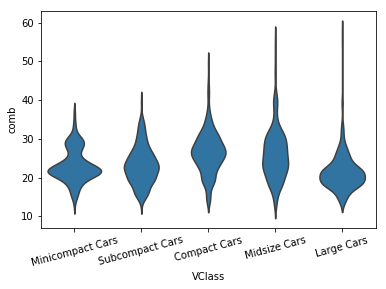

In [9]:
sedan_classes = ['Minicompact Cars', 'Subcompact Cars', 'Compact Cars', 'Midsize Cars', 'Large Cars']
# convert VClass to ordered categorical types
vclasses = pd.api.types.CategoricalDtype(categories=sedan_classes, ordered=True)
fuel_df['VClass'] = fuel_df['VClass'].astype(vclasses)

# violin plot
base_color = sns.color_palette()[0]
sns.violinplot(data=fuel_df, x='VClass', y='comb', color=base_color,
               inner=None) # hide inner box plot
plt.xticks(rotation=15);

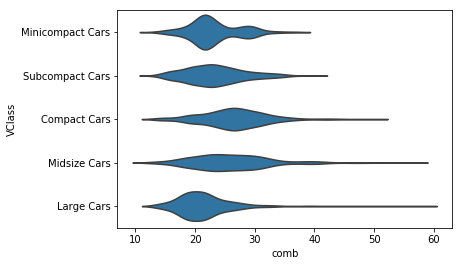

In [10]:
# change x, y for horizontal violin plot
base_color = sns.color_palette()[0]
sns.violinplot(data=fuel_df, y='VClass', x='comb', color=base_color,
               inner=None);

> For each level of the categorical variable, a distribution of the values on the numeric variable is plotted. <br>The distribution is plotted as a kernel density estimate, something like a smoothed histogram. 